# Method 1: DataFarm Style

### Library  Requirement

If use MacBook and you don't have the requests library installed in your Python environment, run the following command line:

In [23]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


So does for certification:

In [ ]:
pip install certifi

So does for seaborn:

In [ ]:
pip install seaborn

### Read Data Test Demo

In [42]:
import requests
import certifi
import xml.etree.ElementTree as ET
import pandas as pd
from io import StringIO

# OData server's URL
url = "https://data.boston.gov/datastore/odata3.0/6ddcd912-32a0-43df-9908-63574f8c7e77"

# Use requests to fetch data, explicitly specifying the CA certificate in certifi
response = requests.get(url, verify=certifi.where())


In [43]:
response.raise_for_status()

# Parsing XML data
root = ET.fromstring(response.content)

# Extract the data and store it in a list
data = []
for entry in root.findall('{http://www.w3.org/2005/Atom}entry'):
    row_data = {}
    for content in entry.findall('{http://www.w3.org/2005/Atom}content'):
        # Remove namespace prefix from tag names
        properties = content.find('{http://schemas.microsoft.com/ado/2007/08/dataservices/metadata}properties')
        for prop in properties:
            row_data[prop.tag] = prop.text
    data.append(row_data)

# Convert data to Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())




  {http://schemas.microsoft.com/ado/2007/08/dataservices}_id  \
0                                                  1           
1                                                  2           
2                                                  3           
3                                                  4           
4                                                  5           

  {http://schemas.microsoft.com/ado/2007/08/dataservices}permitnumber  \
0                                           A1000569                    
1                                            A100071                    
2                                           A1001012                    
3                                           A1001201                    
4                                            A100137                    

  {http://schemas.microsoft.com/ado/2007/08/dataservices}worktype  \
0                                             INTEXT                
1                                     

Rename columns, remove namespace section:

In [44]:
# Rename columns, remove namespace section
df.columns = [col.split('}')[-1] for col in df.columns]

### Checking for and dealing with missing values
Depending on the nature of the data, you may need to deal with missing values. This can be done by filling in missing values, removing rows or columns that contain missing values, and so on.

In [45]:
df.fillna(value="N/A", inplace=True)

### Data Type Conversion
Make sure that the data type of each column is appropriate for its content. For example, dates should be of date type and numbers should be of integer or floating point type.

In [46]:
date_columns = ['issued_date', 'expiration_date']

# Iterate through the list of column names and convert each column to a date type
for col in date_columns:
  # If there is a value that cannot be parsed as a date, it can be converted to NaT with errors='coerce'
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [47]:
price_columns = ['declared_valuation', 'total_fees']

# Iterate through the list of column names and convert each column to a date type
for col in price_columns:
    df[col] = pd.to_numeric(df[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False), errors='coerce')

In [48]:
df['sq_feet'] = pd.to_numeric(df['sq_feet'].str.replace(',', ''), errors='coerce')

### Data exploration and analysis

Obtain descriptive statistics of the data:

In [49]:
print(df.describe())

       declared_valuation     total_fees        sq_feet
count        5.000000e+02     500.000000     500.000000
mean         6.512489e+05    5649.328000    1724.364000
std          5.498242e+06   53321.152934   29255.855434
min          0.000000e+00      20.000000       0.000000
25%          0.000000e+00      32.000000       0.000000
50%          3.100000e+03     180.000000       0.000000
75%          2.425000e+04     416.250000       0.000000
max          8.423046e+07  863205.000000  650000.000000


Calculate the count of unique values in a column:

In [50]:
print(df['declared_valuation'].value_counts())

0.0           137
1.0            43
10000.0        17
1000.0         17
5000.0         12
             ... 
31600.0         1
9500.0          1
160000.0        1
84230456.0      1
155186.0        1
Name: declared_valuation, Length: 135, dtype: int64


Grouping by a column and calculating the average of another column:

In [52]:
print(df.columns)


Index(['_id', 'permitnumber', 'worktype', 'permittypedescr', 'description',
       'comments', 'applicant', 'declared_valuation', 'total_fees',
       'issued_date', 'expiration_date', 'status', 'owner', 'occupancytype',
       'sq_feet', 'address', 'city', 'state', 'zip', 'property_id',
       'parcel_id', 'gpsy', 'gpsx', 'geom_point_2249', 'geom_point_4326'],
      dtype='object')


In [54]:
# Group by 'worktype' and calculate the average of 'declared_valuation'.
average_valuation = df.groupby('worktype')['declared_valuation'].mean()
print(average_valuation)

worktype
ADDITION    2.568225e+06
CELL        1.250000e+04
COB         2.068920e+04
ERECT       0.000000e+00
EXTDEM      0.000000e+00
EXTREN      8.964489e+03
FA          9.831357e+03
INTEXT      1.474429e+06
INTREN      2.184401e+05
N/A         1.099000e+06
NEWCON      0.000000e+00
OTHER       4.895897e+04
SIGNES      3.800000e+03
SITE        0.000000e+00
SPRINK      5.417558e+04
SPRNK9      0.000000e+00
VIOL        2.004000e+05
Name: declared_valuation, dtype: float64


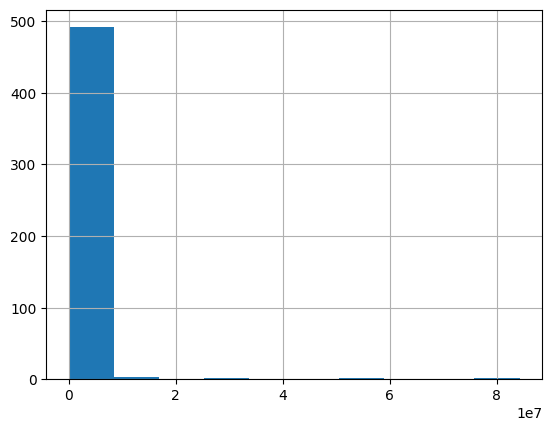

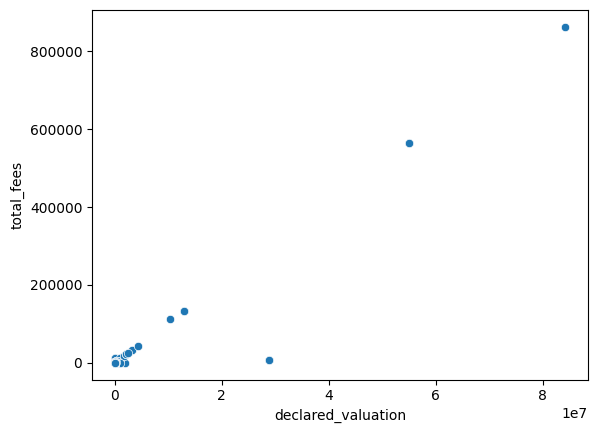

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting a histogram of 'declared_valuation'
df['declared_valuation'].hist()
plt.show()

# Example: Plotting a scatterplot between two columns: 'declared_valuation' and 'total_fees'
sns.scatterplot(data=df, x='declared_valuation', y='total_fees')
plt.show()

In [59]:
print(df)

     _id permitnumber worktype           permittypedescr  \
0      1     A1000569   INTEXT  Amendment to a Long Form   
1      2      A100071      COB  Amendment to a Long Form   
2      3     A1001012    OTHER  Amendment to a Long Form   
3      4     A1001201   INTEXT  Amendment to a Long Form   
4      5      A100137   EXTREN  Amendment to a Long Form   
..   ...          ...      ...                       ...   
495  496     A1126726   SPRINK  Amendment to a Long Form   
496  497     A1126743   INTREN  Amendment to a Long Form   
497  498     A1126927    OTHER  Amendment to a Long Form   
498  499     A1127920       FA  Amendment to a Long Form   
499  500     A1129531   EXTREN  Amendment to a Long Form   

                    description  \
0        Interior/Exterior Work   
1                City of Boston   
2                         Other   
3        Interior/Exterior Work   
4        Renovations - Exterior   
..                          ...   
495   Fire Protection/Sprinkler   

In [60]:
# Print DataFrame in chunks
chunk_size = 10  # Number of rows to print at a time
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    print(df[start:end].to_string())
    print('-' * 50)  # Print the separator lines


  _id permitnumber worktype           permittypedescr                 description                                                                                                                                                                                                                                                                                                                                                                  comments          applicant  declared_valuation  total_fees               issued_date           expiration_date  status                                 owner occupancytype  sq_feet                 address           city state    zip property_id   parcel_id              gpsy              gpsx                                     geom_point_2249                                     geom_point_4326
0   1     A1000569   INTEXT  Amendment to a Long Form      Interior/Exterior Work                                                                                       

# Method 2: SQL Style

In [61]:
import requests
import pandas as pd

# Set the base URL for the API
url = "https://data.boston.gov/api/3/action/datastore_search_sql"

# Construct the SQL query string
# Modify the SQL query according to your needs
sql_query = "SELECT * FROM \"6ddcd912-32a0-43df-9908-63574f8c7e77\" LIMIT 5"

# Prepare the request parameters
params = {
    "sql": sql_query
}

# Send the request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Check if there is data in the response
    if data['success'] and 'result' in data and 'records' in data['result']:
        records = data['result']['records']

        # Convert the records to a Pandas DataFrame
        df = pd.DataFrame.from_records(records)
        print(df)
    else:
        print("No data found or error in response.")
else:
    print("Failed to fetch data:", response.status_code)


   _id                                         _full_text permitnumber  \
0    1  '+00':41,48 '-01':36 '-07':43 '-183':59 '-28':...     A1000569   
1    2  '+00':36,43 '-04':32,39 '-05':38 '-11':31 '00'...      A100071   
2    3  '+00':36 '-01':32 '-06':31 '-19':22 '-3':44 '0...     A1001012   
3    4  '+00':77,84 '-05':79 '-11':72 '-13':73,80 '-19...     A1001201   
4    5  '+00':25,32 '-01':20 '-03':21,28 '-07':27 '-2'...      A100137   

  worktype           permittypedescr             description  \
0   INTEXT  Amendment to a Long Form  Interior/Exterior Work   
1      COB  Amendment to a Long Form          City of Boston   
2    OTHER  Amendment to a Long Form                   Other   
3   INTEXT  Amendment to a Long Form  Interior/Exterior Work   
4   EXTREN  Amendment to a Long Form  Renovations - Exterior   

                                            comments          applicant  \
0  This work is to Amend Permit ALT347244. Elimin...    Patrick Sharkey   
1  Change connector 